<a href="https://colab.research.google.com/github/Sohamp05/demo-repo/blob/main/Soham_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>  <b> NLP Navigator - Assignment 1 </b>  </center>

This is the first assignment of the project and will test your basic python skills and what you have learnt so far about the libraries like numpy and matplotlib. The problem statement and your tasks are described below. You have to rename the notebook as `{Your Name}_Assignment1.ipynb` and write all the code and then generate outputs in it. Submission will be on github and more guidelines will be given soon. The deadline to submit the assignment is `10th June 5:00 PM`

Given a set of $ n $ points in $ d $ dimensional Euclidean Space, we will find all pairs of points whose Euclidean distance is less than $ r $.

Let  $ \overrightarrow{P_1} = (P_{11},P_{12}, \ldots, P_{1d}) $ and $ \overrightarrow{P_2} = (P_{21},P_{22}, \ldots, P_{2d}) $ be two points. Then the Euclidean distance between them is equal to the norm $ \left|\left| \overrightarrow{P_1} - \overrightarrow{P_2} \right|\right| $.

We have to find the set $ A = \left\{(i, j): \left|\left| \overrightarrow{P_1} - \overrightarrow{P_2} \right|\right| \leq r \right\} $ where $ i,j \in \{1,2,3,...,n\} $.


Obviously we can find it by using 2 nested loops and searching over all pairs, but we will do the task in an optimised way. Let us make a grid where each cell is of dimension $ r \times r $. Then, (say d = 2)

![graph1](https://drive.google.com/uc?export=view&id=1qIcPgkv9Q3fI-eV5AaAobjFIYy_2siZN)

Divide the points into the cells based on their coordinates. For example, say $ 4 $ points $ \left( \frac{1}{2}, \frac{2}{3} \right), \left( \frac{2}{3}, \frac{3}{2} \right), \left( 1, 1 \right), \left( \frac{3}{2}, \frac{5}{2} \right) $ and $ r = 1 $. So the division should be like -

![graph2](https://drive.google.com/uc?export=view&id=1-u-mT1PTxOkow_uz0T8ZBjU35u63uU7F)

Now comes the observation: For any point, the points which are within distance $ d $ from it must lie in 8 adjacent cells and no where else. So, for every point, just search the points present in 8 adjacent cells, and add the valid pairs to the answer set $ A $. Please note that for corner cells, the number of adjacent cells will not be equal to 8. So, write your code including those cases also.
##### Some points for higher dimension cases:
1. Think whether the number of adjacent cells for higher dimensions will be 8 or more (or less).
2. Observe that the dimension of each cell will not be $r*r$ for each case.
##### <u>Note</u>: Assume the pair $ (i,j) $ and $ (j,i) $ to be same. So write your code accordingly. For example, in 2-D space, we will count $ ((1,2), (4,5)) $ and $ ((4,5), (1,2)) $ only once.

## Tasks TO DO:

1. Generate a set of $ 1000 $ random points in $ 2 $ dimensional space with coordinates ranging between 0 and 100.
2. For $ r = \{ 1, 2, \ldots, 10 \} $, divide the points into grid as shown.
   - Show using matplotlib the various points using different colours.
   - Find pairs and store them in a list/set $ A $
3. Do task 1 and 2 for $ d = 3, 4, 10, 50, 100 $ (except plotting) and store the results.
(You can also plot for $ d = 3 $ but it is optional)

# Soltuion

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
x = np.random.rand(1000)
x = x*100
y = np.random.rand(1000)
y = y*100
colors = np.random.rand(1000)


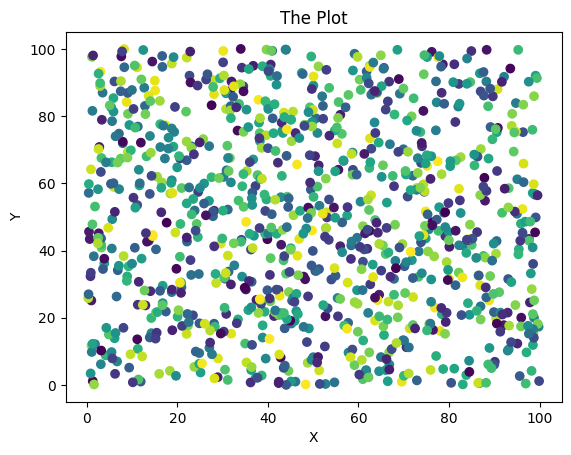

In [82]:
plt.scatter(x, y, c=colors)
# plt.style.use('dark background')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('The Plot')


plt.show()

In [83]:
r = int(input("Enter the value of r:"))

x = x.transpose()
y = y.transpose()
lst = {'x':pd.Series(x),'y':pd.Series(y)}
# lst = lst.transpose()
df = pd.DataFrame(lst)
# df = df.T
df



Enter the value of r:5


,x,y
0,27.540045,61.812460
1,38.229481,72.559978
2,3.852762,36.162135
3,17.386143,77.270980
4,68.079316,47.674243
...,...,...
995,36.335914,23.099438
996,14.013647,84.457438
997,2.441123,42.143801
998,71.136655,11.186348


In [88]:
def points(x,y,r):
  a = (int(x)//r)
  b = (int(y)//r)
  dfnew = df.loc[((df['x']//r)==a) & ((df['y']//r)==b)]
  return dfnew
points(4,6,5)

,x,y
215,1.080480,9.804970
414,4.167298,8.784039
872,3.096094,6.160691


In [85]:
def dist(x1,y1,x2,y2):
  return float(((x2-x1)**2 + (y1-y2)**2)**(1/2))

In [86]:
listf = []
for i in range(1000):
  x1 = (df.loc[i, 'x'])
  y1 = (df.loc[i, 'y'])
  # print(x1+1)
  # print("\n")
  dfn = points(x1,y1,int(r))
  z = dfn.size
  for j in range(z):
    p = df.loc[j, 'x']
    q = df.loc[j, 'y']
    if dist(x1,y1,p,q) <= int(r) and (dist(x1,y1,p,q) > 0):
      listf.append(((x1, y1), (p, q)))
  dfn = points(x1+r,y1,int(r))
  z = dfn.size
  for j in range(z):
    p = df.loc[j, 'x']
    q = df.loc[j, 'y']
    if dist(x1,y1,p,q) <= int(r) and (dist(x1,y1,p,q) > 0):
      listf.append(((x1, y1), (p, q)))
  dfn = points(x1,y1+r,int(r))
  z = dfn.size
  for j in range(z):
    p = df.loc[j, 'x']
    q = df.loc[j, 'y']
    if dist(x1,y1,p,q) <= int(r) and (dist(x1,y1,p,q) > 0):
      listf.append(((x1, y1), (p, q)))
  dfn = points(x1+r,y1+r,int(r))
  z = dfn.size
  for j in range(z):
    p = df.loc[j, 'x']
    q = df.loc[j, 'y']
    if dist(x1,y1,p,q) <= int(r) and (dist(x1,y1,p,q) > 0):
      listf.append(((x1, y1), (p, q)))
  dfn = points(x1-r,y1+r,int(r))
  z = dfn.size
  for j in range(z):
    p = df.loc[j, 'x']
    q = df.loc[j, 'y']
    if dist(x1,y1,p,q) <= int(r) and (dist(x1,y1,p,q) > 0):
      listf.append(((x1, y1), (p, q)))


In [87]:
listf

[((28.129406875403397, 51.84048231802385),
  (26.977829255748365, 54.76046421478388)),
 ((84.70114518928523, 90.12266514081814),
  (82.17325409745588, 89.57751721732544)),
 ((61.95727310397069, 40.52958875743059),
  (66.02030211157812, 38.967290745992564)),
 ((19.30021733585382, 75.30187232356059),
  (17.38614341780982, 77.27098003253678)),
 ((19.30021733585382, 75.30187232356059),
  (17.38614341780982, 77.27098003253678)),
 ((19.30021733585382, 75.30187232356059),
  (17.38614341780982, 77.27098003253678)),
 ((8.120465785915131, 38.35085879583339),
  (3.852762372188634, 36.16213502223208)),
 ((8.120465785915131, 38.35085879583339),
  (3.852762372188634, 36.16213502223208)),
 ((8.120465785915131, 38.35085879583339),
  (3.852762372188634, 36.16213502223208)),
 ((79.2862615371741, 18.732834926178377),
  (78.43943660711403, 21.031665192103645)),
 ((75.86535658059195, 18.116149573586494),
  (78.43943660711403, 21.031665192103645)),
 ((6.831507990411412, 34.12716052298311),
  (3.852762372188

In [ ]:
#for d= n
# just have those many coordinates as argument and for nth dimension there will be n*(n+2) adjancent cells just check half of it and change the distnace function accordingly